## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

from keras import Model
from neural_networks.fcrn import FCRN_A
from utils.data.data_generator import DataGenerator
from pprint import pprint

Using TensorFlow backend.


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Experiment parameters

In [4]:
DATASET_NAME = 'vgg_cells'
DATASET_PATH = f'../../datasets/{DATASET_NAME}'
IMG_DIM = None
D_MAP_MULT_FACT = None

if DATASET_NAME.lower() == 'vgg_cells':
    # misc
    IMG_DIM = (256, 256, 3)
    D_MAP_MULT_FACT = 100.
    # checkpoints
    CHECKPOINT_FILENAME_a = f'./vgg_cells/n_64_sigma_5_randseed_645_loss_logcosh_full_img'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_b = f'./vgg_cells/n_64_sigma_5_randseed_644_loss_mse_patch_4_128x128'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_c = f'./vgg_cells/n_64_sigma_5_randseed_643_loss_mse_patch_4_128x128'\
                            f'/checkpoints/best_model.hdf5'
    # plots
    fraction=0.045
    dist = 3
    dist_mid = 1
    figsize = (18, 18)
    
elif DATASET_NAME.lower() == 'carpk':
    # misc
    IMG_DIM = (720, 1280, 3)
    D_MAP_MULT_FACT = 2000.
    # checkpoints
    CHECKPOINT_FILENAME_a = f'./carpk/sigma_10_loss_logcosh_patch_32_128x128_5_epochs'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_b = f'./carpk/sigma_10_loss_mse_patch_32_128x128_epochs_5'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_c = f'./carpk/sigma_10_loss_mse_patch_32_128x128_epochs_10'\
                            f'/checkpoints/best_model.hdf5'
    # plots
    fraction=0.027
    dist = 15
    dist_mid = 3
    figsize = (20, 20)
    
elif DATASET_NAME.lower() == 'shanghai_tech/part_b':
    # misc
    IMG_DIM = (768, 1024, 3)
    D_MAP_MULT_FACT = 2000.
    # checkpoints
    CHECKPOINT_FILENAME_a = f'./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_30'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_b = f'./shanghai_tech/part_b/sigma_10_loss_mae_full_img_epochs_100'\
                            f'/checkpoints/best_model.hdf5'
    CHECKPOINT_FILENAME_c = f'./shanghai_tech/part_b/sigma_10_loss_mse_patch_32_128x128_epochs_100'\
                            f'/checkpoints/best_model.hdf5'
    # plots
    fraction=0.035
    dist = 10
    dist_mid = 3
    figsize=(18, 18)

In [5]:
params = {
    'dim': IMG_DIM,
    'batch_size': 2,
    'patches_per_image': 1,
    'density_map_multiplication_factor': D_MAP_MULT_FACT,
    'shuffle': False
}

test_generator = DataGenerator(DATASET_PATH, 'test', **params)
test_data = test_generator.__getitem__(0)

print(test_data[0].shape)
print(test_data[1].shape)

(2, 256, 256, 3)
(2, 256, 256, 1)


## 3. Weights visualization

In [6]:
def get_fcrn_a_weights(checkpoint_filename, layer_idx=1):
    model = FCRN_A(pretrained_weights=checkpoint_filename)
    return model.layers[layer_idx].get_weights()[0]

In [7]:
w1_a = get_fcrn_a_weights(CHECKPOINT_FILENAME_a, 1)
w1_b = get_fcrn_a_weights(CHECKPOINT_FILENAME_b, 1)
w1_c = get_fcrn_a_weights(CHECKPOINT_FILENAME_c, 1)

In [8]:
def norm_img(img):
    if img.max() == img.min():
        return img - img.min()
    return (img - img.min()) / (img.max() - img.min())

def plot_h_w_c_n(w, title='', rows=2, cols=16, figsize=(15, 2)):
    print(title)
    plt.figure(figsize=figsize)
    for i in range(min(rows*cols, w.shape[-1])):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(norm_img(w[:,:,:,i]).squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

                                           Layer 1 (weights) (model a)


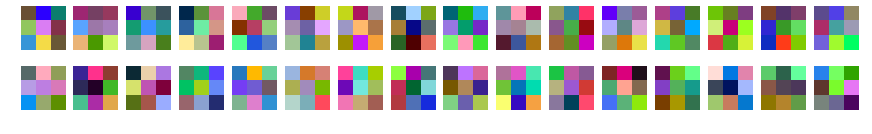

                                           Layer 1 (weights) (model b)


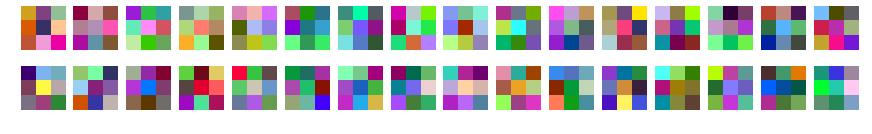

                                           Layer 1 (weights) (model c)


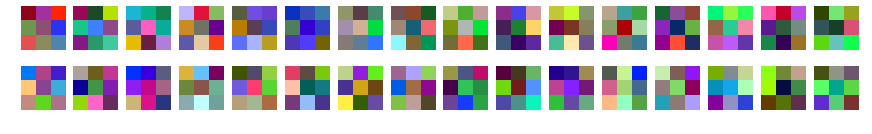

In [9]:
plot_h_w_c_n(w1_a, f'{" "*43}Layer 1 (weights) (model a)')
plot_h_w_c_n(w1_b, f'{" "*43}Layer 1 (weights) (model b)')
plot_h_w_c_n(w1_c, f'{" "*43}Layer 1 (weights) (model c)')

## 4. Visualize layers activations

In [10]:
def get_fcrn_a_layer_activations(checkpoint_filename, data, layer_idx):
    model = FCRN_A(pretrained_weights=checkpoint_filename)
    activation_model = Model(inputs=model.input, outputs=[model.layers[layer_idx].output])
    activations = activation_model.predict(data)
    return activations   

In [11]:
# k-th conv layer is the 2*k-1 layer in our fcrn_a
# because of conv->max_pool and conv->upsampling alternating layers
act1 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 1 - 1)
act2 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 2 - 1)
act3 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 3 - 1)
act4 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 4 - 1)
act5 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 5 - 1)
act6 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 6 - 1)
act7 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], 2 * 7 - 1)
act8 = get_fcrn_a_layer_activations(CHECKPOINT_FILENAME_a, test_data[0], -1)

In [12]:
print(act1.shape)
print(act2.shape)
print(act3.shape)
print(act4.shape)
print(act5.shape)
print(act6.shape)
print(act7.shape)
print(act8.shape)

(2, 256, 256, 32)
(2, 128, 128, 64)
(2, 64, 64, 128)
(2, 32, 32, 512)
(2, 64, 64, 128)
(2, 128, 128, 64)
(2, 256, 256, 32)
(2, 256, 256, 1)


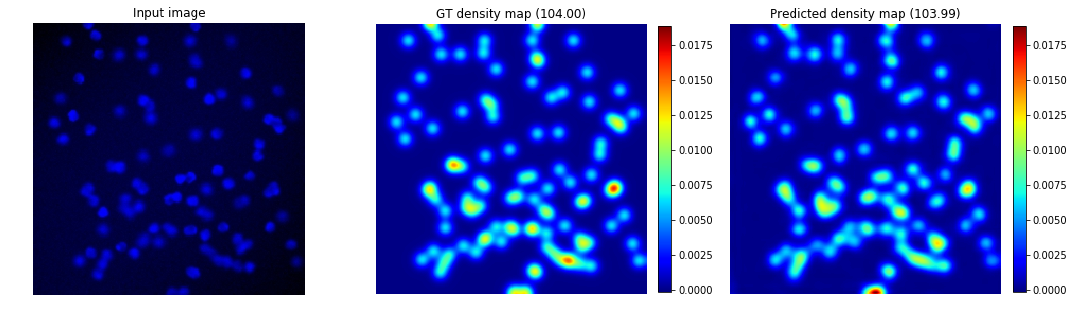

In [13]:
vmin = min(test_data[1][0].min()/D_MAP_MULT_FACT, act8[0].min()/D_MAP_MULT_FACT)
vmax = max(test_data[1][0].max()/D_MAP_MULT_FACT, act8[0].max()/D_MAP_MULT_FACT)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title('Input image')
plt.imshow(test_data[0][0])
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title(f'GT density map ({test_data[1][0].sum()/D_MAP_MULT_FACT:.2f})')
plt.imshow(test_data[1][0].squeeze()/D_MAP_MULT_FACT, cmap='jet', vmin=vmin, vmax=vmax)
plt.axis('off')
plt.colorbar(fraction=fraction, pad=0.04)
plt.subplot(1, 3, 3)
plt.title(f'Predicted density map ({act8[0].sum()/D_MAP_MULT_FACT:.2f})')
plt.imshow(act8[0].squeeze()/D_MAP_MULT_FACT, cmap='jet', vmin=vmin, vmax=vmax)
plt.axis('off')
plt.colorbar(fraction=fraction, pad=0.04)
plt.show()

In [14]:
def grid_array(a, rows, cols, dist):
    # a.shape: (h,w,ch)
    h_a, w_a = a.shape[:2]
    grid_h = (h_a + dist) * rows - dist
    grid_w = (w_a + dist) * cols - dist
    grid_a = np.ones((grid_h, grid_w), dtype=np.float32)
    
    for i in range(min(rows * cols, a.shape[-1])):
        start_row = (i // cols) * (h_a + dist)
        end_row = start_row + h_a
        
        start_col = (i % cols) * (w_a + dist)
        end_col = start_col + w_a
        
        grid_a[start_row:end_row, start_col:end_col] = norm_img(a[:,:,i])
        
    return grid_a

def plot_grid(a, rows=4, cols=8, dist=3, title='', figsize=(16, 8)):
    grid = grid_array(a, rows, cols, dist)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(grid, cmap='gray')
    plt.axis('off')
    plt.show()

Model a


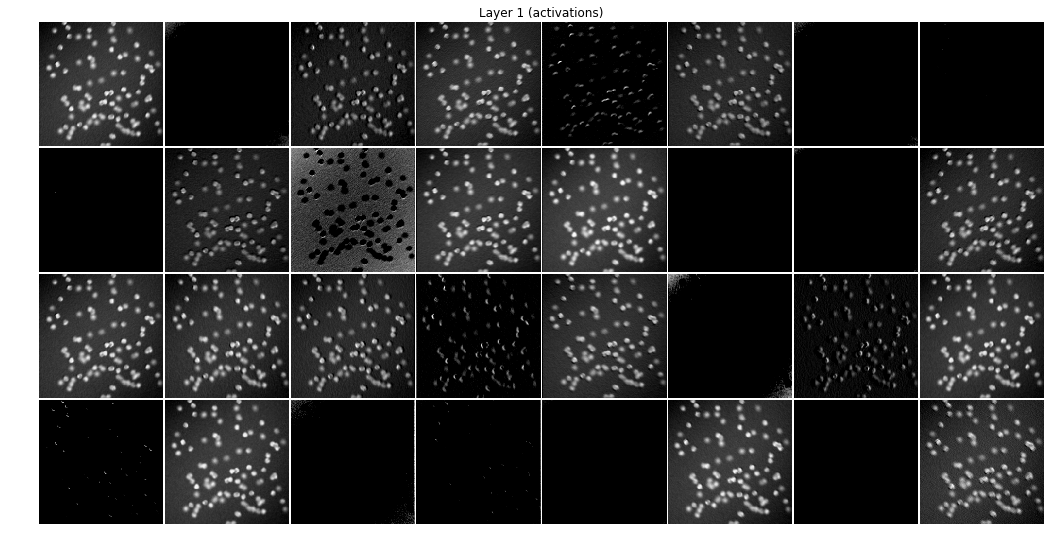

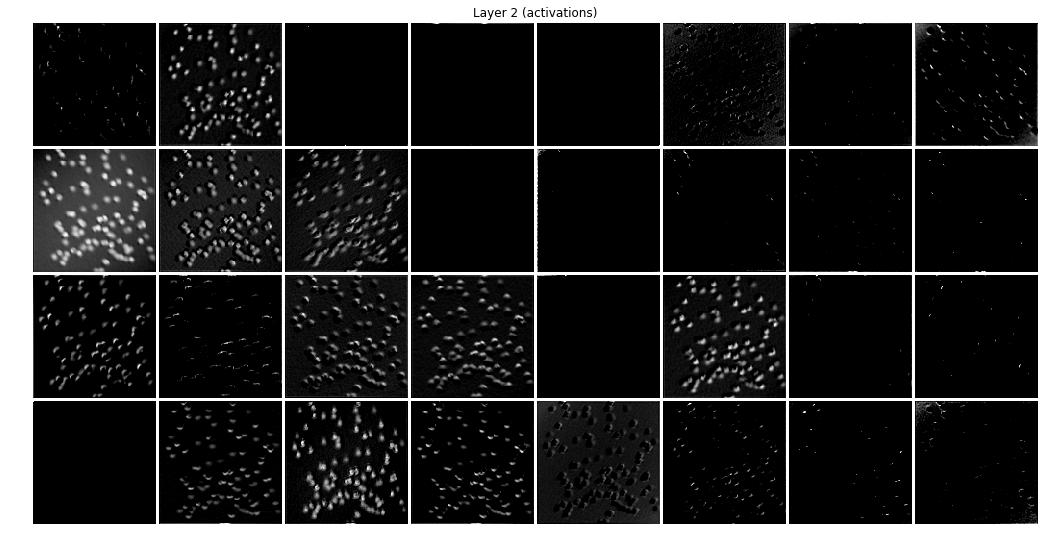

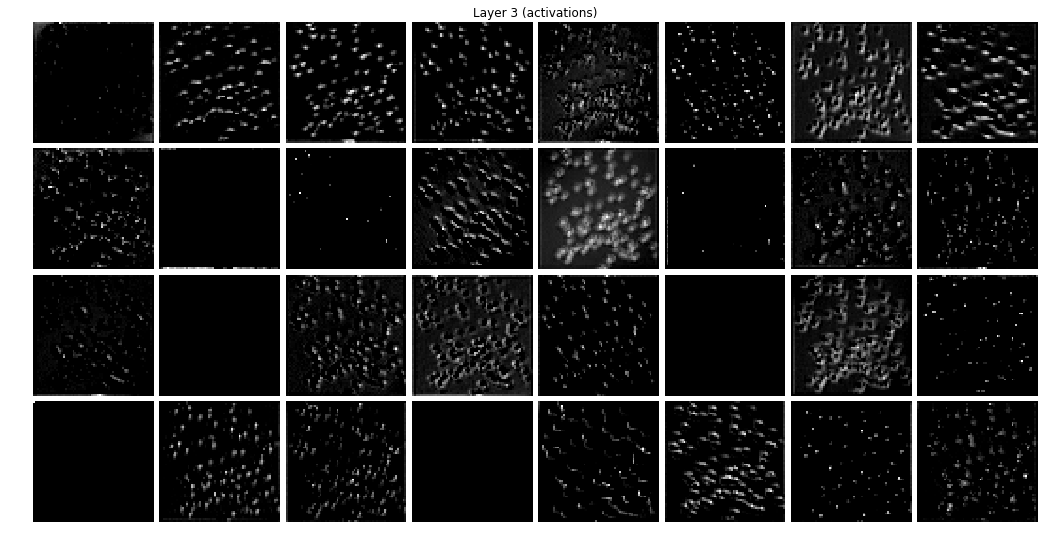

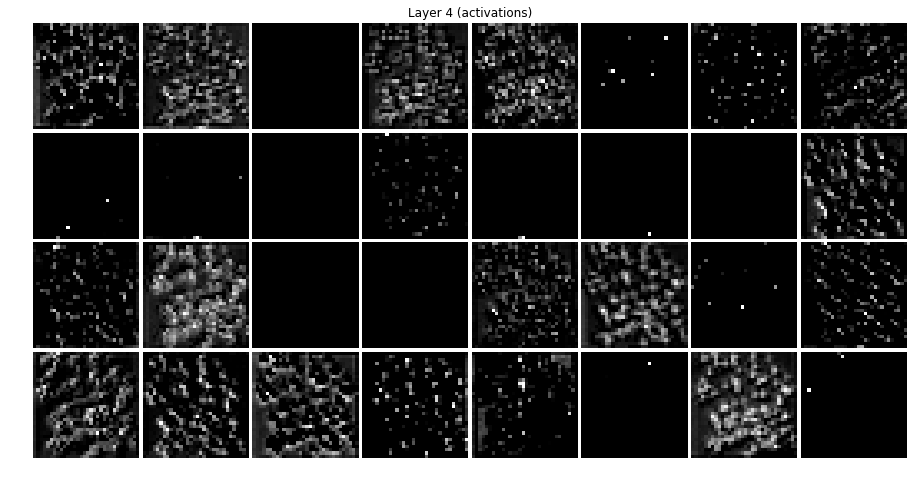

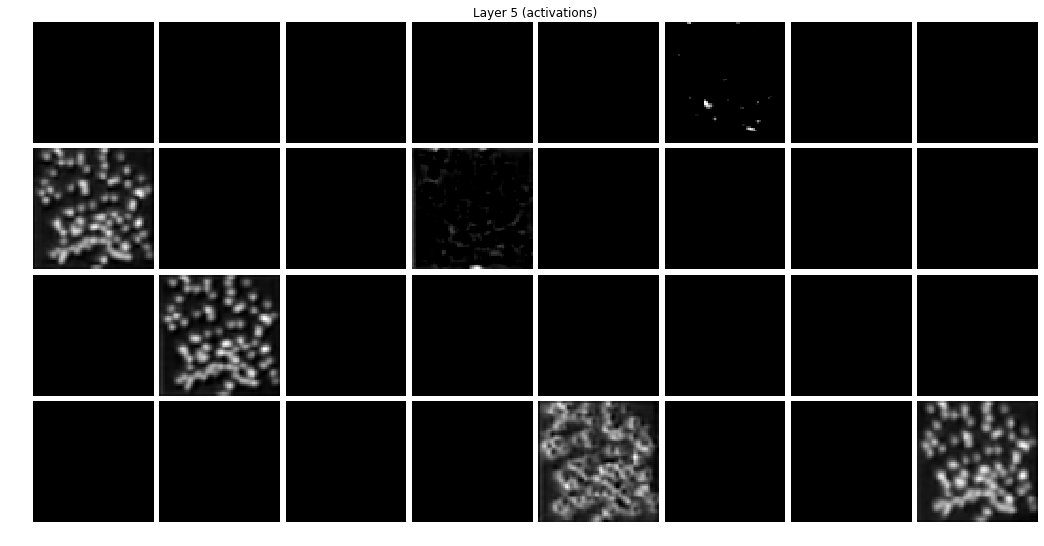

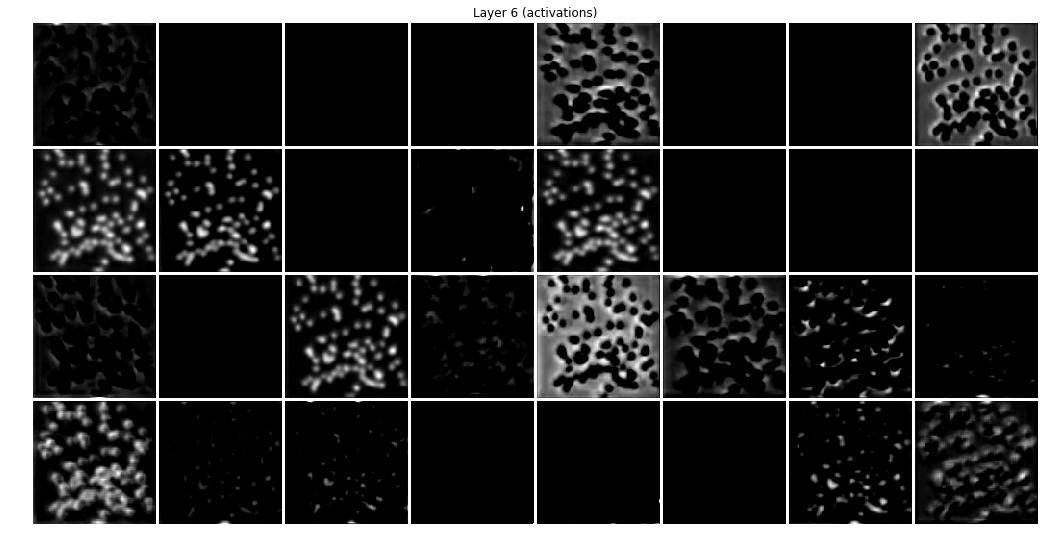

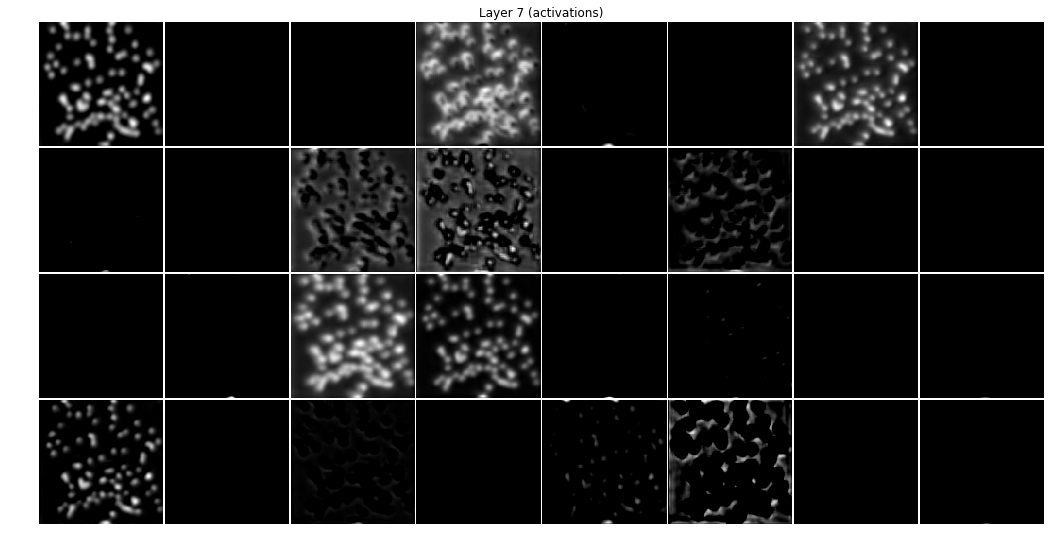

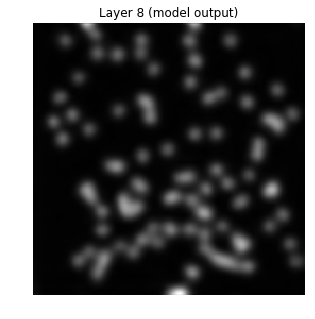

In [15]:
print('Model a')
plot_grid(act1[0], title="Layer 1 (activations)", dist=dist, figsize=figsize)
plot_grid(act2[0], title="Layer 2 (activations)", dist=dist, figsize=figsize)
plot_grid(act3[0], title="Layer 3 (activations)", dist=dist, figsize=figsize)
plot_grid(act4[0], title="Layer 4 (activations)", dist=dist_mid)
plot_grid(act5[0], title="Layer 5 (activations)", dist=dist, figsize=figsize)
plot_grid(act6[0], title="Layer 6 (activations)", dist=dist, figsize=figsize)
plot_grid(act7[0], title="Layer 7 (activations)", dist=dist, figsize=figsize)
plot_grid(act8[0], rows=1, cols=1, title='Layer 8 (model output)', figsize=(5, 5))